<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-02-21 22:24:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.6’

m4_survey_data.sqli 100%[===================>]  34.98M  34.4MB/s    in 1.0s    

2024-02-21 22:24:18 (34.4 MB/s) - ‘m4_survey_data.sqlite.6’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM  Master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT DISTINCT(COUNT(Respondent))
FROM  DatabaseWorkedWith
where DatabaseWorkedWith="MySQL"
"""
#order by Respondent desc
pd.read_sql_query(QUERY,conn)

,(COUNT(Respondent))
0,5469


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Frequency'>

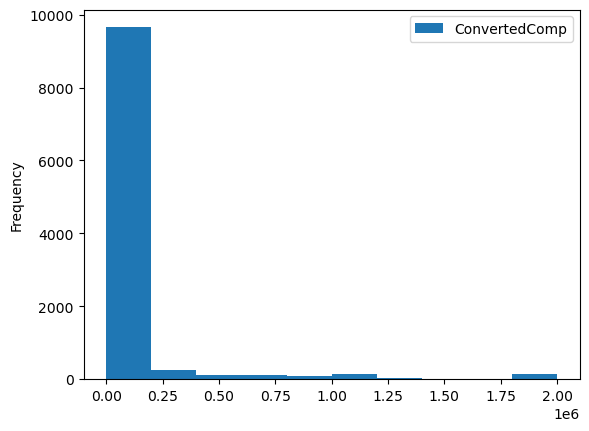

In [8]:
# your code goes here
QUERY = """
SELECT ConvertedComp 
FROM master
"""
df=pd.read_sql_query(QUERY,conn)
df.head()
df.plot(kind="hist")

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

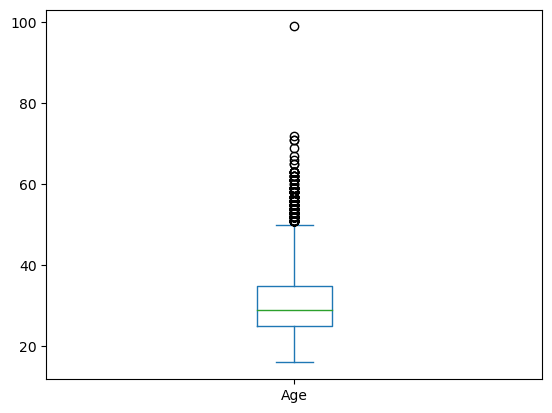

In [9]:
# your code goes here
QUERY = """
SELECT Age 
FROM master
"""
df=pd.read_sql_query(QUERY,conn)
df.head()
df.plot(kind="box")


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

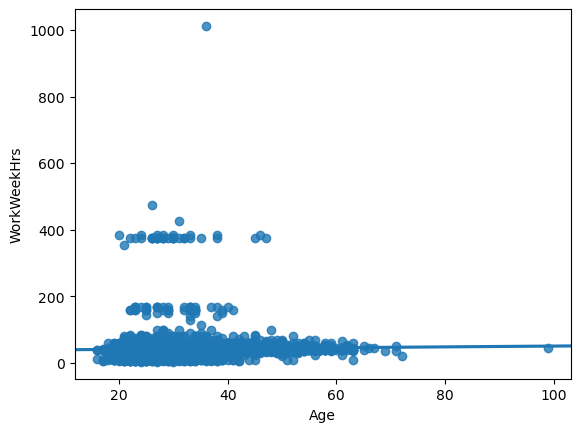

In [10]:
# your code goes here
import seaborn as sns
QUERY = """
SELECT Age ,WorkWeekHrs
FROM master
"""
df=pd.read_sql_query(QUERY,conn)
df.head()
sns.regplot(x="Age",y="WorkWeekHrs",data=df)

### Bubble Plots


WorkWeekHrsWorkWeekHrsCreate a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

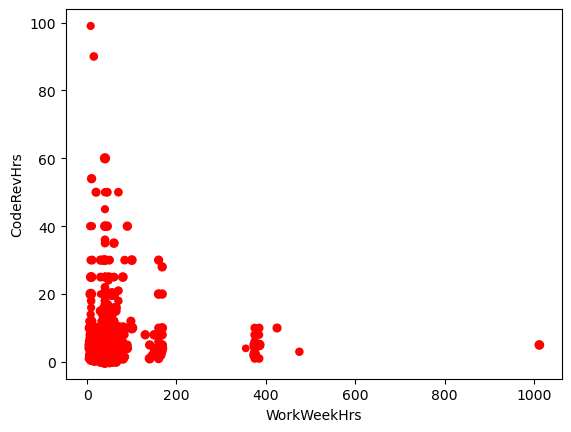

In [11]:
# your code goes here
QUERY = """
SELECT Age ,WorkWeekHrs,CodeRevHrs
FROM master
"""
df=pd.read_sql_query(QUERY,conn)
df.head()
df.plot(kind="scatter",color="red",x="WorkWeekHrs",y="CodeRevHrs",s="Age")


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


<AxesSubplot:ylabel='Respondent'>

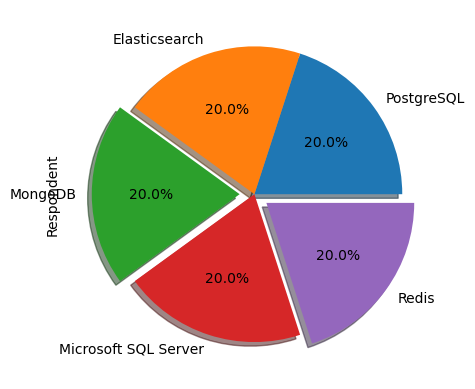

In [12]:
# your code goes here

QUERY = """
SELECT DatabaseDesireNextYear,Respondent
FROM  DatabaseDesireNextYear
order by Respondent DESC
limit 5
"""

df=pd.read_sql_query(QUERY,conn)
df
df.plot(kind="pie",y="Respondent",autopct="%1.1F%%",labels=df["DatabaseDesireNextYear"],shadow=True,explode=[0,0,.1,0,.1],legend=False)

<AxesSubplot:ylabel='COUNT'>

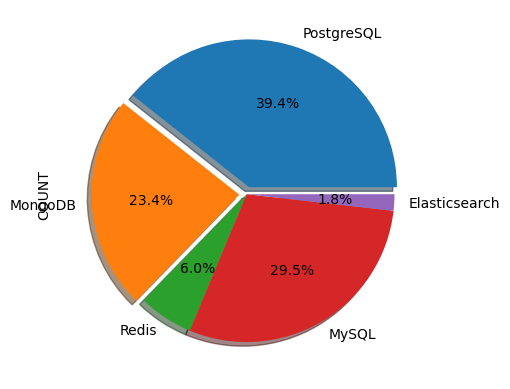

In [13]:
QUERY = """
SELECT DatabaseWorkedWith,count(DatabaseWorkedWith) AS COUNT
FROM  DatabaseWorkedWith
group by DatabaseWorkedWith
order by Respondent 
limit 5
"""
labels = ['PostgreSQL', 'MongoDB', 'Redis','MySQL', 'Elasticsearch']
df=pd.read_sql_query(QUERY,conn)
df
df.plot(kind="pie",y="COUNT",autopct="%1.1F%%",labels=labels,shadow=True,explode=[0.05,0.05,0,0,0],legend=False)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [21]:
# your code goes here
QUERY = """
SELECT Age
ROUND(AVG(WorkWeekHrs), 0) AS Median_Latitude FROM ( SELECT WorkWeekHrs, ROW_NUMBER() OVER (ORDER BY WorkWeekHrs) AS RowNum, COUNT(*) OVER () AS TotalRows FROM master) AS SubQuery WHERE RowNum IN ((TotalRows + 1) / 2, (TotalRows + 2) / 2),
ROUND(AVG(CodeRevHrs), 0) AS Median_Latitude FROM ( SELECT CodeRevHrs, ROW_NUMBER() OVER (ORDER BY CodeRevHrs) AS RowNum, COUNT(*) OVER () AS TotalRows FROM master ) AS SubQuery WHERE RowNum IN ((TotalRows + 1) / 2, (TotalRows + 2) / 2)
  
FROM master;

"""
'''
ROUND(AVG(WorkWeekHrs), 0) AS Median_Latitude FROM ( SELECT WorkWeekHrs, ROW_NUMBER() OVER (ORDER BY WorkWeekHrs) AS RowNum, COUNT(*) OVER () AS TotalRows FROM master) AS SubQuery WHERE RowNum IN ((TotalRows + 1) / 2, (TotalRows + 2) / 2);
ROUND(AVG(CodeRevHrs), 0) AS Median_Latitude FROM ( SELECT CodeRevHrs, ROW_NUMBER() OVER (ORDER BY CodeRevHrs) AS RowNum, COUNT(*) OVER () AS TotalRows FROM master ) AS SubQuery WHERE RowNum IN ((TotalRows + 1) / 2, (TotalRows + 2) / 2);
'''
df=pd.read_sql_query(QUERY,conn)
df.head()
#df["Age"].plot(kind="bar")




DatabaseError: Execution failed on sql '
SELECT Age
ROUND(AVG(WorkWeekHrs), 0) AS Median_Latitude FROM ( SELECT WorkWeekHrs, ROW_NUMBER() OVER (ORDER BY WorkWeekHrs) AS RowNum, COUNT(*) OVER () AS TotalRows FROM master) AS SubQuery WHERE RowNum IN ((TotalRows + 1) / 2, (TotalRows + 2) / 2),
ROUND(AVG(CodeRevHrs), 0) AS Median_Latitude FROM ( SELECT CodeRevHrs, ROW_NUMBER() OVER (ORDER BY CodeRevHrs) AS RowNum, COUNT(*) OVER () AS TotalRows FROM master ) AS SubQuery WHERE RowNum IN ((TotalRows + 1) / 2, (TotalRows + 2) / 2)
  
FROM master;

': near "(": syntax error

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

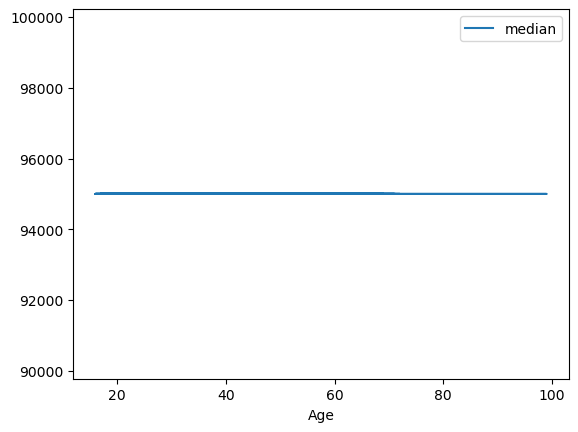

In [38]:
Q = """ SELECT Age, (SELECT ROUND(AVG(ConvertedComp), 0) AS Median_Latitude
FROM ( SELECT ConvertedComp, ROW_NUMBER() OVER (ORDER BY ConvertedComp) AS RowNum, COUNT(*) OVER () AS TotalRows FROM master WHERE AGE BETWEEN 45 AND 60 ) AS SubQuery
WHERE RowNum IN ((TotalRows + 1) / 2, (TotalRows + 2) / 2) ) as median
FROM master 
"""

df = pd.read_sql_query(Q, conn)

df.head()

df.plot(kind = 'line',x="Age",y="median")

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:ylabel='MainBranch'>

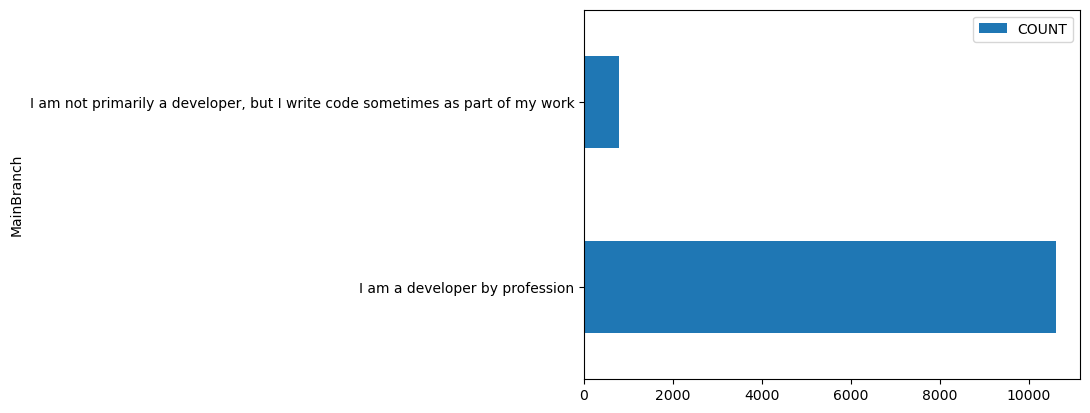

In [44]:
# your code goes here

QUERY = """
SELECT MainBranch,COUNT(MainBranch) AS COUNT
FROM master
group by MainBranch
"""
df=pd.read_sql_query(QUERY,conn)

df["MainBranch"]=df["MainBranch"].rename({"I am a developer by profession":"developer by profession",
"I am not primarily a developer, but I write co...":"not primarily a developer"})
#df.plot(kind="barh",x="MainBranch",y="COUNT")

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
